In [1]:
# Import modules
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation, rc
from IPython.display import HTML

# Import PySwarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
### define function
def criterion(X):
    z = X[:, 0] ** 2 +X[:, 1]**2
    return z    

In [3]:
options = {'c1':0.5, 'c2':0.3, 'w':0.9}

#constraints= (np.array([-500, 500]),
#              np.array([500, 500]))
#bounds=constraints

optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=2, options=options)
cost, pos = optimizer.optimize(criterion, iters=100)

2019-05-09 22:32:10,086 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=7.53e-08
2019-05-09 22:32:11,304 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 7.529713853862684e-08, best pos: [0.00016036 0.00022267]


In [4]:
pos3D= (pos[0],pos[1],cost)
pos3D

(0.0001603634956089849, 0.00022266721315607717, 7.529713853862684e-08)

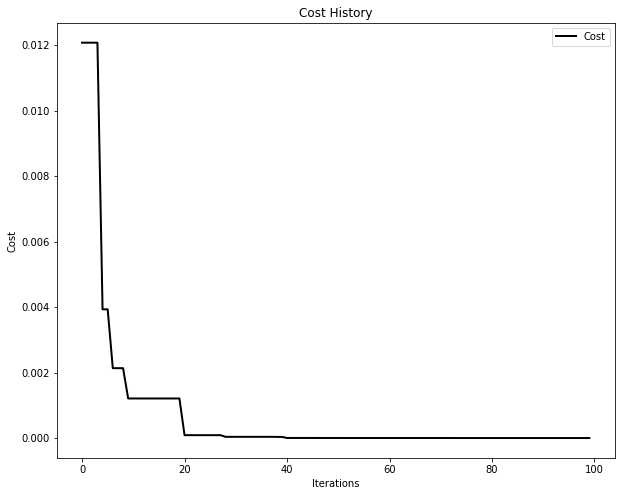

In [5]:
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

In [6]:
# equivalent to rcParams['animation.html'] = 'html5'
# See http://louistiao.me/posts/notebooks/save-matplotlib-animations-as-gifs/
rc('animation', html='html5')

In [7]:
from pyswarms.utils.plotters.formatters import Mesher, Designer

# Initialize mesher with sphere function

m = Mesher(func=criterion)
m.levels = np.arange(-2.0, 2.0, 0.1)
d = Designer(
        limits=[(-1,1),(-1,1)], label=["x","y"]
)

In [8]:
m

Mesher(func=<function criterion at 0x7f1c07134400>, delta=0.001, limits=[(-1, 1), (-1, 1)], levels=array([-2.00000000e+00, -1.90000000e+00, -1.80000000e+00, -1.70000000e+00,
       -1.60000000e+00, -1.50000000e+00, -1.40000000e+00, -1.30000000e+00,
       -1.20000000e+00, -1.10000000e+00, -1.00000000e+00, -9.00000000e-01,
       -8.00000000e-01, -7.00000000e-01, -6.00000000e-01, -5.00000000e-01,
       -4.00000000e-01, -3.00000000e-01, -2.00000000e-01, -1.00000000e-01,
        1.77635684e-15,  1.00000000e-01,  2.00000000e-01,  3.00000000e-01,
        4.00000000e-01,  5.00000000e-01,  6.00000000e-01,  7.00000000e-01,
        8.00000000e-01,  9.00000000e-01,  1.00000000e+00,  1.10000000e+00,
        1.20000000e+00,  1.30000000e+00,  1.40000000e+00,  1.50000000e+00,
        1.60000000e+00,  1.70000000e+00,  1.80000000e+00,  1.90000000e+00]), alpha=0.3)

2019-05-09 22:32:13,707 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2019-05-09 22:32:13,710 - matplotlib.animation - INFO - MovieWriter.run: running command: ['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '720x576', '-pix_fmt', 'rgba', '-r', '12.5', '-loglevel', 'quiet', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/tmp/tmp453c5ksn/temp.m4v']


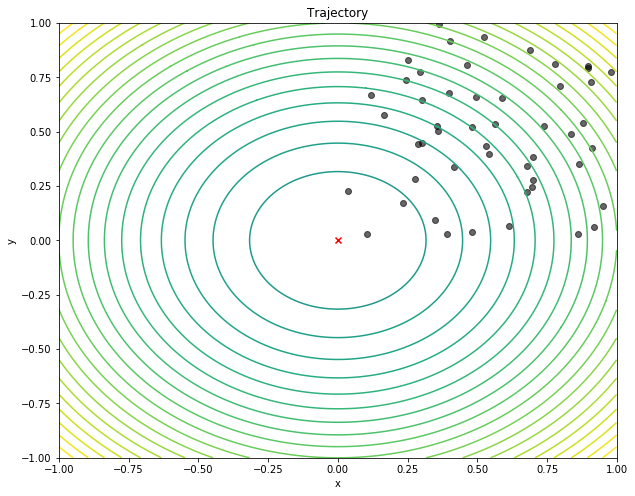

In [9]:
# Make animation
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=pos,
                         designer=d
                        )

# Enables us to view it in a Jupyter notebook
HTML(animation.to_html5_video())

2019-05-09 22:32:30,028 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2019-05-09 22:32:30,030 - matplotlib.animation - INFO - MovieWriter.run: running command: ['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '720x576', '-pix_fmt', 'rgba', '-r', '12.5', '-loglevel', 'quiet', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/tmp/tmpi8x28kpa/temp.m4v']


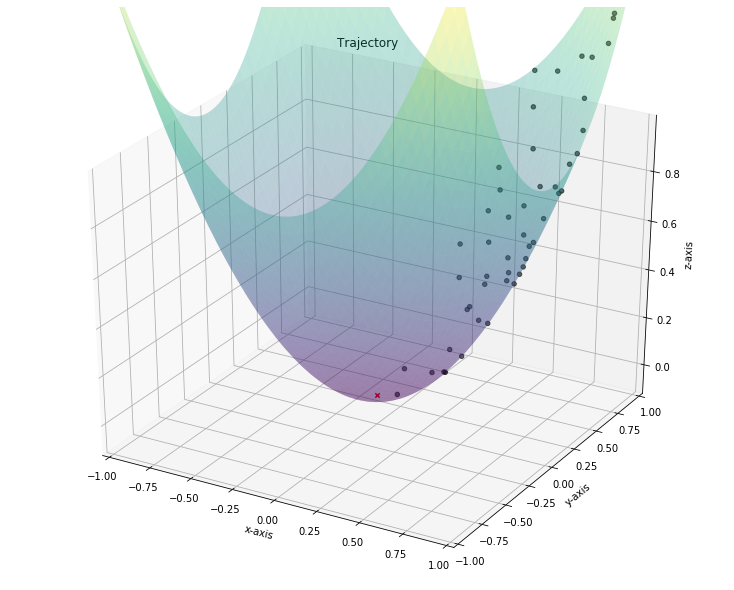

In [10]:
input_3D = optimizer.pos_history
pos_history_3d = m.compute_history_3d(input_3D)

# Make a designer and set the x,y,z limits to (-1,1), (-1,1) and (-0.1,1) respectively
from pyswarms.utils.plotters.formatters import Designer
d = Designer(limits=[(-1,1), (-1,1), (-0.1,1)], label=['x-axis', 'y-axis', 'z-axis'])

# Make animation
animation3d = plot_surface(pos_history=pos_history_3d, # Use the cost_history we computed
                           mesher=m, designer=d,       # Customizations
                           mark=(0,0,0))               # Mark minima

# Enables us to view it in a Jupyter notebook
HTML(animation3d.to_html5_video())